<a href="https://colab.research.google.com/github/jainarpit09/sentimental_analysis-NLP/blob/main/financial_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [ ]:
# Import all the required libraries 
import re
import pandas as pd
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer


#import stopwords and text processing libraries

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

#import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Basic EDA on cnbc_headlines dataset

In [ ]:
# Read csv file of cnbc headlines using pandas
cnbc_df = pd.read_csv("/content/cnbc_headlines.csv")

In [ ]:
cnbc_df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
# check the shape of cnbc headline dataset
cnbc_df.shape

(3080, 3)

In [ ]:
# Check all the columns in the cnbc headline dataset
cnbc_df.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
cnbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc_df.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [ ]:
 # drop nan values in cnbc headline dataset
cnbc_df.dropna(inplace = True)

In [ ]:
# drop the duplicate rows in the dataset keep the first one
cnbc_df.drop_duplicates(subset = ["Headlines", "Description"] , keep = "first", inplace = True)
cnbc_df.reset_index(drop = True, inplace = True)
cnbc_df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2785,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2786,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2787,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2788,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
# check the shape of cnbc headline dataset
cnbc_df.shape

(2790, 3)

# Basic EDA on Gaurdian headlines dataset

In [ ]:
# Read csv file of gaurdian headlines using pandas
gaurdian_df = pd.read_csv("/content/guardian_headlines.csv")

In [ ]:
gaurdian_df

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [ ]:
#check the shape of gaurdian headline dataset
gaurdian_df.shape

(17800, 2)

In [ ]:
#check columns of gaurdian headline
gaurdian_df.columns

Index(['Time', 'Headlines'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
gaurdian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [ ]:
# check null values in gaurdian headlines dataset
gaurdian_df.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [ ]:
# drop duplicate rows in headlines and keep the first one
gaurdian_df.drop_duplicates(subset = ["Headlines"], keep = "first", inplace = True)
gaurdian_df.reset_index(drop = True, inplace = True)
gaurdian_df

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17790,17-Dec-17,How investing in solar energy can create a bri...
17791,17-Dec-17,Poundland suppliers hit by insurance downgrade
17792,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17793,17-Dec-17,Unilever sells household name spreads to KKR f...


# Basic EDA on reuters headlines

In [ ]:
# Read csv file of reuters headlines using using pandas
reuters_df = pd.read_csv("/content/reuters_headlines.csv")

In [ ]:
reuters_df

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [ ]:
#check the shape of reuters headlines dataset
reuters_df.shape

(32770, 3)

In [ ]:
#check the columns of reuters headline dataset
reuters_df.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
reuters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [ ]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters_df.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters_df.drop_duplicates(subset = ["Headlines","Description"], keep = "first", inplace = True)
reuters_df.reset_index(drop = True, inplace = True)
reuters_df

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [ ]:
# create a function for preprocessing 
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
def text_preprocessing(text):
  text = text.lower()

  #convert all to lowercase


  #remove puntuations
  output = string.punctuation
  text = text.translate(str.maketrans('', '', output))
  #remove stopword
  stopwordslist = stopwords.words('english')
  tokenwords = word_tokenize(text)
  text1 =  [word for word in tokenwords if word not in stopwordslist]

  #stemming
  ps = PorterStemmer()
  stemmed_words = [ps.stem(w) for w in text1 ]


  #lemmitizing
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w) for w in stemmed_words]

  return  " ".join(lemma_words)



  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [ ]:
# import sentiment intensity analyzer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


# create sentiment intensity analyzer object



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#fuction to  decide sentiment as positive, negative and neutral
def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentimental_analysis(df, column_name):
  df['polarity_scores'] = df[column_name].apply(lambda w: sid.polarity_scores(w))
  df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
  df['ds_score'] = df['compound_score'].apply(mapper)

  return df


# Now working with description on datasets

In [ ]:
# concatenate cnbc headlines dataset and reuters headline dataset
cnbc_reuters  = pd.concat([cnbc_df, reuters_df], axis = 0)

In [ ]:
#check the shape of this new dataset
cnbc_reuters.shape

(35463, 3)

In [ ]:
#make a copy of new dataset 
cnbc_reuters_copy = cnbc_reuters.copy(deep = True)

In [ ]:
# apply preprocessing to the description of new dataset

cnbc_reuters["Description"] = cnbc_reuters["Description"].apply(text_preprocessing)



In [ ]:
cnbc_reuters

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...
...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...


In [ ]:
# analyze polarity score of values in description and  add new column of it in dataset
cnbc_reuters['polarity_scores'] = cnbc_reuters["Description"].apply(lambda w: sid.polarity_scores(w))
cnbc_reuters['compound_score'] = cnbc_reuters['polarity_scores'].apply(lambda x: x['compound'])
cnbc_reuters["score" ] = cnbc_reuters["compound_score"].apply(mapper)
cnbc_reuters

,Headlines,Time,Description,polarity_scores,compound_score,score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,"{'neg': 0.184, 'neu': 0.517, 'pos': 0.299, 'co...",0.2500,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.4939,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,"{'neg': 0.08, 'neu': 0.632, 'pos': 0.287, 'com...",0.5574,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.7096,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,"{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp...",-0.6597,Negative
...,...,...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2732,Negative
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,"{'neg': 0.101, 'neu': 0.858, 'pos': 0.041, 'co...",-0.3818,Negative


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



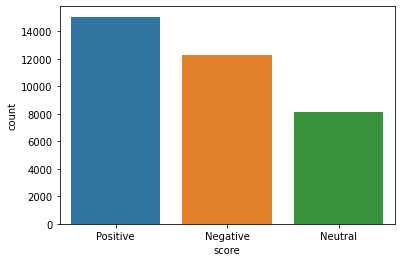

In [ ]:
# plot a count plot on description score column
sns.countplot(cnbc_reuters["score"])

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [ ]:
# pie chart on description score column
import plotly.express as px
fig = px.pie(cnbc_reuters, names = 'score')
fig.show()

In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [ ]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X_train, X_test, y_train, y_test = train_test_split(cnbc_reuters["Description"], cnbc_reuters["score"], test_size = 0.1, random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

# fit the pipeline to the train data
pipe1 = pipe.fit(X_train, y_train) 
print("MODEL - LINEAR SVC")
# predict on test dataset
y_pred = pipe1.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))

MODEL - LINEAR SVC
accuracy_score : 92.9235974062588
confusion_matrix : [[1117   53   55]
 [  31  769   20]
 [  55   37 1410]]
classification_report :               precision    recall  f1-score   support

    Negative       0.93      0.91      0.92      1225
     Neutral       0.90      0.94      0.92       820
    Positive       0.95      0.94      0.94      1502

    accuracy                           0.93      3547
   macro avg       0.92      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

CPU times: user 1.92 s, sys: 67.7 ms, total: 1.99 s
Wall time: 2 s


LOGISTIC REGRESSION


In [ ]:

%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# fit the pipeline to the train data
pipe2 = pipe.fit(X_train, y_train) 
print("MODEL - LOGISTIC REGRESSION")
# predict on test dataset
y_pred = pipe2.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy_score : 89.11756413870877
confusion_matrix : [[1044   95   86]
 [  45  739   36]
 [  70   54 1378]]
classification_report :               precision    recall  f1-score   support

    Negative       0.90      0.85      0.88      1225
     Neutral       0.83      0.90      0.87       820
    Positive       0.92      0.92      0.92      1502

    accuracy                           0.89      3547
   macro avg       0.88      0.89      0.89      3547
weighted avg       0.89      0.89      0.89      3547

CPU times: user 6.66 s, sys: 7.08 s, total: 13.7 s
Wall time: 7.72 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# fit the pipeline to the train data
pipe3 = pipe.fit(X_train, y_train) 
print("MODEL - MULTINOMIAL NAIVE BAYES")
# predict on test dataset
y_pred = pipe3.predict(X_test)
#print accuracy
print("accuracy_score : {}%".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))
 

MODEL - MULTINOMIAL NAIVE BAYES
accuracy_score : 62.165210036650684%
confusion_matrix : [[ 734    8  483]
 [ 159   97  564]
 [ 121    7 1374]]
classification_report :               precision    recall  f1-score   support

    Negative       0.72      0.60      0.66      1225
     Neutral       0.87      0.12      0.21       820
    Positive       0.57      0.91      0.70      1502

    accuracy                           0.62      3547
   macro avg       0.72      0.54      0.52      3547
weighted avg       0.69      0.62      0.57      3547

CPU times: user 981 ms, sys: 77.1 ms, total: 1.06 s
Wall time: 1.06 s


BERNOULLI NAIVE BAYES


In [ ]:

%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

# fit the pipeline to the train data
pipe4 = pipe.fit(X_train, y_train) 
print("MODEL - BERNOULLI NAIVE BAYES")
# predict on test dataset
y_pred = pipe4.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))

MODEL - BERNOULLI NAIVE BAYES
accuracy_score : 73.69608119537638
confusion_matrix : [[ 887   69  269]
 [ 135  493  192]
 [ 194   74 1234]]
classification_report :               precision    recall  f1-score   support

    Negative       0.73      0.72      0.73      1225
     Neutral       0.78      0.60      0.68       820
    Positive       0.73      0.82      0.77      1502

    accuracy                           0.74      3547
   macro avg       0.74      0.72      0.73      3547
weighted avg       0.74      0.74      0.73      3547

CPU times: user 1.01 s, sys: 37.8 ms, total: 1.04 s
Wall time: 1.05 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 10, max_depth = 5, random_state = 55))])

# fit the pipeline to the train data
pipe6 = pipe.fit(X_train, y_train) 
print("MODEL - GRADIENT BOOSTING CLASSIFER")
# predict on test dataset
y_pred = pipe6.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))

MODEL - GRADIENT BOOSTING CLASSIFER
accuracy_score : 42.514801240484914
confusion_matrix : [[   6    0 1219]
 [   0    0  820]
 [   0    0 1502]]
classification_report :               precision    recall  f1-score   support

    Negative       1.00      0.00      0.01      1225
     Neutral       0.00      0.00      0.00       820
    Positive       0.42      1.00      0.60      1502

    accuracy                           0.43      3547
   macro avg       0.47      0.33      0.20      3547
weighted avg       0.52      0.43      0.26      3547

CPU times: user 14.1 s, sys: 515 ms, total: 14.6 s
Wall time: 14.6 s


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance', learning_rate = 0.01,
                                         n_estimators = 10, max_depth = 5, random_state= 2020))])

# fit the pipeline to the train data
pipe7 = pipe.fit(X_train, y_train) 
print("MODEL - XGBOOST CLASSIFIER")
# predict on test dataset
y_pred = pipe7.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))

MODEL - XGBOOST CLASSIFIER
accuracy_score : 49.16831124894277
confusion_matrix : [[ 285    1  939]
 [   4    0  816]
 [  43    0 1459]]
classification_report :               precision    recall  f1-score   support

    Negative       0.86      0.23      0.37      1225
     Neutral       0.00      0.00      0.00       820
    Positive       0.45      0.97      0.62      1502

    accuracy                           0.49      3547
   macro avg       0.44      0.40      0.33      3547
weighted avg       0.49      0.49      0.39      3547

CPU times: user 6.27 s, sys: 60.5 ms, total: 6.33 s
Wall time: 6.32 s


DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,
                                                  splitter = 'best', random_state = 2020))])

# fit the pipeline to the train data
pipe8 = pipe.fit(X_train, y_train) 
print("MODEL - DECISION TREE CLASSIFIER")
# predict on test dataset
y_pred = pipe8.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report :\n {}" .format(classification_report(y_test, y_pred)))

MODEL - DECISION TREE CLASSIFIER
accuracy_score : 50.69072455596279
confusion_matrix : [[1105    1  119]
 [ 810    0   10]
 [ 807    2  693]]
classification_report :
               precision    recall  f1-score   support

    Negative       0.41      0.90      0.56      1225
     Neutral       0.00      0.00      0.00       820
    Positive       0.84      0.46      0.60      1502

    accuracy                           0.51      3547
   macro avg       0.42      0.45      0.39      3547
weighted avg       0.50      0.51      0.45      3547

CPU times: user 3.1 s, sys: 5.99 ms, total: 3.1 s
Wall time: 3.1 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10, weights = 'distance', algorithm = 'brute'))])

# fit the pipeline to the train data
pipe9 = pipe9.fit(X_train, y_train) 
print("MODEL - K NEAREST NEIGHBOR")
# predict on test dataset
y_pred = pipe.predict(X_test)
#print accuracy
print("accuracy_score : {} %".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))

MODEL - K NEAREST NEIGHBOR


NotFittedError: ignored

In [ ]:
# helper function for comparing models matric
def compare_models(models, names, X_test, y_train, y_test):
    # the libraries we need
    from sklearn.metrics import classification_report
    
    for (model, name) in zip(models, names):
      print(name)
      y_pred = model.predict(X_test)
      print("classification_report :\n {}" .format(classification_report(y_test, y_pred)))

    # create a dataframe with column matric and metric name as value
   
   
    # then predict on the test set
    

In [ ]:
# list of model objects
models = [pipe1, pipe2, pipe3, pipe4, pipe6, pipe7, pipe8, pipe9 ]
# list of model names
names = ['Linear SVC', "Logistic", "MultinomialNB", "BernoulliNB", "Gradientboost","XGB", "decision tree", "KNN"]
# print the comparison of models
compare_models(models, names, X_test, y_train, y_test)

Linear SVC
classification_report :
               precision    recall  f1-score   support

    Negative       0.93      0.91      0.92      1225
     Neutral       0.90      0.94      0.92       820
    Positive       0.95      0.94      0.94      1502

    accuracy                           0.93      3547
   macro avg       0.92      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

Logistic
classification_report :
               precision    recall  f1-score   support

    Negative       0.90      0.85      0.88      1225
     Neutral       0.83      0.90      0.87       820
    Positive       0.92      0.92      0.92      1502

    accuracy                           0.89      3547
   macro avg       0.88      0.89      0.89      3547
weighted avg       0.89      0.89      0.89      3547

MultinomialNB
classification_report :
               precision    recall  f1-score   support

    Negative       0.72      0.60      0.66      1225
     Neutral       0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



classification_report :
               precision    recall  f1-score   support

    Negative       0.86      0.23      0.37      1225
     Neutral       0.00      0.00      0.00       820
    Positive       0.45      0.97      0.62      1502

    accuracy                           0.49      3547
   macro avg       0.44      0.40      0.33      3547
weighted avg       0.49      0.49      0.39      3547

decision tree
classification_report :
               precision    recall  f1-score   support

    Negative       0.41      0.90      0.56      1225
     Neutral       0.00      0.00      0.00       820
    Positive       0.84      0.46      0.60      1502

    accuracy                           0.51      3547
   macro avg       0.42      0.45      0.39      3547
weighted avg       0.50      0.51      0.45      3547

KNN
classification_report :
               precision    recall  f1-score   support

    Negative       0.61      0.56      0.59      1225
     Neutral       0.47      0.36   

# working with test dataset

In [ ]:
# Perforn the prediction on the test dataset
y_pred = pipe1.predict(X_test)
y_pred

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_pred)

In [ ]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# Now working with headlines + description

In [ ]:
# merge headlines and description of new dataset and name it info
cnbc_reuters["info"] = cnbc_reuters["Headlines"] + cnbc_reuters["Description"]
cnbc_reuters

,Headlines,Time,Description,polarity_scores,compound_score,score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,"{'neg': 0.184, 'neu': 0.517, 'pos': 0.299, 'co...",0.2500,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.4939,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,"{'neg': 0.08, 'neu': 0.632, 'pos': 0.287, 'com...",0.5574,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.7096,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,"{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'comp...",-0.6597,Negative,Wall Street delivered the 'kind of pullback I'...
...,...,...,...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Malaysia says never hired British data firm at...
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Prosecutors search Volkswagen headquarters in ...
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2732,Negative,McDonald's sets greenhouse gas reduction targe...
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,"{'neg': 0.101, 'neu': 0.858, 'pos': 0.041, 'co...",-0.3818,Negative,Pratt & Whitney to deliver spare A320neo engin...


In [ ]:
# only keep info and time column . drop all remaining columns
cnbc_reuters.drop(["Headlines","Description", "polarity_scores", "compound_score", "score"], axis = 1, inplace = True)
cnbc_reuters

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...
...,...,...
32668,Mar 20 2018,Malaysia says never hired British data firm at...
32669,Mar 20 2018,Prosecutors search Volkswagen headquarters in ...
32670,Mar 20 2018,McDonald's sets greenhouse gas reduction targe...
32671,Mar 20 2018,Pratt & Whitney to deliver spare A320neo engin...


In [ ]:
# apply preprocessing on info column
cnbc_reuters["info"] = cnbc_reuters['info'].apply(text_preprocessing)
cnbc_reuters

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...


In [ ]:
# analyze polarity score of values in info and  add new column of it in dataset
cnbc_reuters['score'] = cnbc_reuters["info"].apply(lambda w: sid.polarity_scores(w))
cnbc_reuters['score'] = cnbc_reuters['score'].apply(lambda x: x['compound'])


In [ ]:
# apply the function  which decides sentiment to  polarity score column
cnbc_reuters["score" ] = cnbc_reuters["score"].apply(mapper)
cnbc_reuters

,Time,info,score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



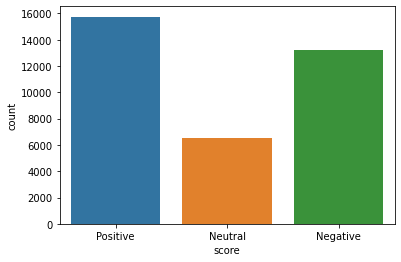

In [ ]:
# perform count plot on info_score column
import seaborn as sns
sns.countplot(cnbc_reuters["score"])

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [ ]:
# perform pie chart on info_score column
import plotly.express as px
fig = px.pie(cnbc_reuters, names = 'score')
fig.show()

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [ ]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X_train, X_test, y_train, y_test = train_test_split(cnbc_reuters["info"], cnbc_reuters["score"], test_size = 0.1, random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [ ]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

# fit the pipeline to the train data
pipe11 = pipe.fit(X_train, y_train) 
print("MODEL - LINEAR SVC")
# predict on test dataset
y_pred = pipe11.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))

MODEL - LINEAR SVC
accuracy_score : 90.837327318861
confusion_matrix : [[1192   54   80]
 [  45  569   48]
 [  56   42 1461]]
classification_report :               precision    recall  f1-score   support

    Negative       0.92      0.90      0.91      1326
     Neutral       0.86      0.86      0.86       662
    Positive       0.92      0.94      0.93      1559

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

CPU times: user 2.35 s, sys: 10.6 ms, total: 2.36 s
Wall time: 2.38 s


LOGISTIC REGRESSION


In [ ]:

%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# fit the pipeline to the train data
pipe22 = pipe.fit(X_train, y_train) 
print("MODEL - LOGISTIC REGRESSION")
# predict on test dataset
y_pred = pipe22.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy_score : 86.32647307583873
confusion_matrix : [[1142   67  117]
 [  83  486   93]
 [  87   38 1434]]
classification_report :               precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      1326
     Neutral       0.82      0.73      0.78       662
    Positive       0.87      0.92      0.90      1559

    accuracy                           0.86      3547
   macro avg       0.86      0.84      0.85      3547
weighted avg       0.86      0.86      0.86      3547

CPU times: user 10.2 s, sys: 11.4 s, total: 21.6 s
Wall time: 13.4 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# fit the pipeline to the train data
pipe33 = pipe.fit(X_train, y_train) 
print("MODEL - MULTINOMIAL NAIVE BAYES")
# predict on test dataset
y_pred = pipe33.predict(X_test)
#print accuracy
print("accuracy_score : {}%".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))
 

MODEL - MULTINOMIAL NAIVE BAYES
accuracy_score : 62.813645334085145%
confusion_matrix : [[ 788    1  537]
 [ 147    9  506]
 [ 126    2 1431]]
classification_report :               precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1326
     Neutral       0.75      0.01      0.03       662
    Positive       0.58      0.92      0.71      1559

    accuracy                           0.63      3547
   macro avg       0.69      0.51      0.47      3547
weighted avg       0.67      0.63      0.56      3547

CPU times: user 1.37 s, sys: 10.6 ms, total: 1.38 s
Wall time: 1.39 s


BERNOULLI NAIVE BAYES


In [ ]:

%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

# fit the pipeline to the train data
pipe44 = pipe.fit(X_train, y_train) 
print("MODEL - BERNOULLI NAIVE BAYES")
# predict on test dataset
y_pred = pipe44.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))
 

MODEL - BERNOULLI NAIVE BAYES
accuracy_score : 68.50859881590075
confusion_matrix : [[ 950   15  361]
 [ 173  155  334]
 [ 215   19 1325]]
classification_report :               precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      1326
     Neutral       0.82      0.23      0.36       662
    Positive       0.66      0.85      0.74      1559

    accuracy                           0.69      3547
   macro avg       0.73      0.60      0.61      3547
weighted avg       0.71      0.69      0.66      3547

CPU times: user 1.35 s, sys: 6.49 ms, total: 1.36 s
Wall time: 1.37 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 10, max_depth = 5, random_state = 55))])

# fit the pipeline to the train data
pipe66 = pipe.fit(X_train, y_train) 
print("MODEL - GRADIENT BOOSTING CLASSIFER")
# predict on test dataset
y_pred = pipe66.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))
 

MODEL - GRADIENT BOOSTING CLASSIFER
accuracy_score : 44.17817874259938
confusion_matrix : [[  10    0 1316]
 [   0    0  662]
 [   2    0 1557]]
classification_report :               precision    recall  f1-score   support

    Negative       0.83      0.01      0.01      1326
     Neutral       0.00      0.00      0.00       662
    Positive       0.44      1.00      0.61      1559

    accuracy                           0.44      3547
   macro avg       0.42      0.34      0.21      3547
weighted avg       0.51      0.44      0.27      3547

CPU times: user 18.3 s, sys: 24.2 ms, total: 18.3 s
Wall time: 18.3 s


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance', learning_rate = 0.01,
                                         n_estimators = 10, max_depth = 5, random_state= 2020))])

# fit the pipeline to the train data
pipe77 = pipe.fit(X_train, y_train) 
print("MODEL - XGBOOST CLASSIFIER")
# predict on test dataset
y_pred = pipe77.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))


MODEL - XGBOOST CLASSIFIER
accuracy_score : 51.33915985339724
confusion_matrix : [[ 308    0 1018]
 [   1    0  661]
 [  46    0 1513]]
classification_report :               precision    recall  f1-score   support

    Negative       0.87      0.23      0.37      1326
     Neutral       0.00      0.00      0.00       662
    Positive       0.47      0.97      0.64      1559

    accuracy                           0.51      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.53      0.51      0.42      3547

CPU times: user 8.45 s, sys: 25.4 ms, total: 8.47 s
Wall time: 8.46 s


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,
                                                  splitter = 'best', random_state = 2020))])

# fit the pipeline to the train data
pipe88 = pipe.fit(X_train, y_train) 
print("MODEL - DECISION TREE CLASSIFIER")
# predict on test dataset
y_pred = pipe88.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report :\n {}" .format(classification_report(y_test, y_pred)))


MODEL - DECISION TREE CLASSIFIER
accuracy_score : 52.77699464336059
confusion_matrix : [[1164    3  159]
 [ 655    0    7]
 [ 851    0  708]]
classification_report :
               precision    recall  f1-score   support

    Negative       0.44      0.88      0.58      1326
     Neutral       0.00      0.00      0.00       662
    Positive       0.81      0.45      0.58      1559

    accuracy                           0.53      3547
   macro avg       0.42      0.44      0.39      3547
weighted avg       0.52      0.53      0.47      3547

CPU times: user 4.03 s, sys: 12.9 ms, total: 4.05 s
Wall time: 4.05 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10, weights = 'distance', algorithm = 'brute'))])

# fit the pipeline to the train data
pipe99 = pipe.fit(X_train, y_train) 
print("MODEL - K NEAREST NEIGHBOR")
# predict on test dataset
y_pred = pipe99.predict(X_test)
#print accuracy
print("accuracy_score : {} %".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))


MODEL - K NEAREST NEIGHBOR
accuracy_score : 56.385678037778405 %
confusion_matrix : [[ 760   89  477]
 [ 195  154  313]
 [ 337  136 1086]]
classification_report :               precision    recall  f1-score   support

    Negative       0.59      0.57      0.58      1326
     Neutral       0.41      0.23      0.30       662
    Positive       0.58      0.70      0.63      1559

    accuracy                           0.56      3547
   macro avg       0.52      0.50      0.50      3547
weighted avg       0.55      0.56      0.55      3547

CPU times: user 5.34 s, sys: 50.6 ms, total: 5.4 s
Wall time: 5.37 s


In [ ]:
# helper function for comparing models matric

    # the libraries we need

    # create a dataframe with column matric and metric name as value

    # then predict on the test set
   
    

In [ ]:
models = [pipe11, pipe22, pipe33, pipe44, pipe66, pipe77, pipe88, pipe99 ]
# list of model names
names = ['Linear SVC', "Logistic", "MultinomialNB", "BernoulliNB", "Gradientboost","XGB", "decision tree", "KNN"]
# print the comparison of models
compare_models(models, names, X_test, y_train, y_test)

Linear SVC
classification_report :
               precision    recall  f1-score   support

    Negative       0.92      0.90      0.91      1326
     Neutral       0.86      0.86      0.86       662
    Positive       0.92      0.94      0.93      1559

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

Logistic
classification_report :
               precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      1326
     Neutral       0.82      0.73      0.78       662
    Positive       0.87      0.92      0.90      1559

    accuracy                           0.86      3547
   macro avg       0.86      0.84      0.85      3547
weighted avg       0.86      0.86      0.86      3547

MultinomialNB
classification_report :
               precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1326
     Neutral       0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



classification_report :
               precision    recall  f1-score   support

    Negative       0.83      0.01      0.01      1326
     Neutral       0.00      0.00      0.00       662
    Positive       0.44      1.00      0.61      1559

    accuracy                           0.44      3547
   macro avg       0.42      0.34      0.21      3547
weighted avg       0.51      0.44      0.27      3547

XGB


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



classification_report :
               precision    recall  f1-score   support

    Negative       0.87      0.23      0.37      1326
     Neutral       0.00      0.00      0.00       662
    Positive       0.47      0.97      0.64      1559

    accuracy                           0.51      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.53      0.51      0.42      3547

decision tree
classification_report :
               precision    recall  f1-score   support

    Negative       0.44      0.88      0.58      1326
     Neutral       0.00      0.00      0.00       662
    Positive       0.81      0.45      0.58      1559

    accuracy                           0.53      3547
   macro avg       0.42      0.44      0.39      3547
weighted avg       0.52      0.53      0.47      3547

KNN
classification_report :
               precision    recall  f1-score   support

    Negative       0.59      0.57      0.58      1326
     Neutral       0.41      0.23   

# working with test data

In [ ]:
# Perforn the prediction on the test dataset
y_pred = pipe11.predict(X_test)
y_pred

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_pred)

In [ ]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# now working on headlines

In [ ]:
# from the dataset you have copied before delete the column of description
cnbc_reuters_copy.drop(["Description"], axis =1, inplace = True)
cnbc_reuters

,Time,info,score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


In [ ]:
# remane the date column in gaurdian headlines dataset  to time
gaurdian_df.rename(columns = {"Date" : "Time"}, inplace = True)
gaurdian_df

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17790,17-Dec-17,How investing in solar energy can create a bri...
17791,17-Dec-17,Poundland suppliers hit by insurance downgrade
17792,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17793,17-Dec-17,Unilever sells household name spreads to KKR f...


In [ ]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together
df = pd.concat([gaurdian_df, cnbc_reuters_copy], axis = 0 )


In [ ]:
df

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
32668,Mar 20 2018,Malaysia says never hired British data firm at...
32669,Mar 20 2018,Prosecutors search Volkswagen headquarters in ...
32670,Mar 20 2018,McDonald's sets greenhouse gas reduction targets
32671,Mar 20 2018,Pratt & Whitney to deliver spare A320neo engin...


In [ ]:
# check the shape of all headlines dataset
df.shape

(53258, 2)

In [ ]:
#apply preprocessin to the headlines column in the new dataset
df["Headlines"] = df["Headlines"].apply(text_preprocessing)

In [ ]:
# analyze polarity score of values in headlines and  add new column of it in dataset
df['score'] = df["Headlines"].apply(lambda w: sid.polarity_scores(w))
df['score'] = df['score'].apply(lambda x: x['compound'])


In [ ]:
# apply the function  which decides sentiment to  polarity score column
df["score" ] = df["score"].apply(mapper)
df


,Time,Headlines,score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear worst ’ four grim tale work life upend ...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...,Negative
...,...,...,...
32668,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32669,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32670,Mar 20 2018,mcdonald set greenhous ga reduct target,Neutral
32671,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Neutral


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



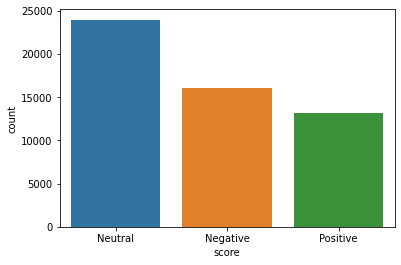

In [ ]:
#perform countplot on headline score column
import seaborn as sns
sns.countplot(df["score"])


In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [ ]:
#perform pie digram on headline score column
import plotly.express as px
fig = px.pie(df, names = 'score')
fig.show()


In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [ ]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X_train, X_test, y_train, y_test = train_test_split(df["Headlines"], df["score"], test_size = 0.1, random_state = 212)


LINEAR SUPPORT VECTOR MACHINE

In [ ]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

# fit the pipeline to the train data
linear_SVC = pipe.fit(X_train, y_train) 
print("MODEL - LINEAR SVC")
# predict on test dataset
y_pred = linear_SVC.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))


MODEL - LINEAR SVC
accuracy_score : 97.44648892226812
confusion_matrix : [[1568   37   37]
 [   2 2326    4]
 [  42   14 1296]]
classification_report :               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1642
     Neutral       0.98      1.00      0.99      2332
    Positive       0.97      0.96      0.96      1352

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

CPU times: user 1.65 s, sys: 7.77 ms, total: 1.66 s
Wall time: 1.68 s


LOGISTIC REGRESSION

In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# fit the pipeline to the train data
logistic = pipe.fit(X_train, y_train) 
print("MODEL - LOGISTIC REGRESSION")
# predict on test dataset
y_pred = logistic.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy_score : 94.085617724371
confusion_matrix : [[1479  115   48]
 [   2 2326    4]
 [  64   82 1206]]
classification_report :               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1642
     Neutral       0.92      1.00      0.96      2332
    Positive       0.96      0.89      0.92      1352

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

CPU times: user 7.11 s, sys: 8.77 s, total: 15.9 s
Wall time: 8.91 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# fit the pipeline to the train data
multinomialNB = pipe.fit(X_train, y_train) 
print("MODEL - MULTINOMIAL NAIVE BAYES")
# predict on test dataset
y_pred = multinomialNB.predict(X_test)
#print accuracy
print("accuracy_score : {}%".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))


MODEL - MULTINOMIAL NAIVE BAYES
accuracy_score : 84.26586556515208%
confusion_matrix : [[1369  207   66]
 [  49 2259   24]
 [ 201  291  860]]
classification_report :               precision    recall  f1-score   support

    Negative       0.85      0.83      0.84      1642
     Neutral       0.82      0.97      0.89      2332
    Positive       0.91      0.64      0.75      1352

    accuracy                           0.84      5326
   macro avg       0.86      0.81      0.82      5326
weighted avg       0.85      0.84      0.84      5326

CPU times: user 884 ms, sys: 6.38 ms, total: 890 ms
Wall time: 891 ms


BERNOULLI NAIVE BAYES


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',  BernoulliNB())])

# fit the pipeline to the train data
bernoulliNB = pipe.fit(X_train, y_train) 
print("MODEL - BERNOULLI NAIVE BAYES")
# predict on test dataset
y_pred = bernoulliNB.predict(X_test)
#print accuracy
print("accuracy_score : {}%".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))



MODEL - BERNOULLI NAIVE BAYES
accuracy_score : 89.12880210289148%
confusion_matrix : [[1445   66  131]
 [ 107 2153   72]
 [ 154   49 1149]]
classification_report :               precision    recall  f1-score   support

    Negative       0.85      0.88      0.86      1642
     Neutral       0.95      0.92      0.94      2332
    Positive       0.85      0.85      0.85      1352

    accuracy                           0.89      5326
   macro avg       0.88      0.88      0.88      5326
weighted avg       0.89      0.89      0.89      5326

CPU times: user 909 ms, sys: 4.54 ms, total: 914 ms
Wall time: 913 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 10, max_depth = 5, random_state = 55))])

# fit the pipeline to the train data
GBR = pipe.fit(X_train, y_train) 
print("MODEL - GRADIENT BOOSTING CLASSIFER")
# predict on test dataset
y_pred = GBR.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))


MODEL - GRADIENT BOOSTING CLASSIFER
accuracy_score : 43.785204656402556
confusion_matrix : [[   0 1642    0]
 [   0 2332    0]
 [   0 1352    0]]
classification_report :               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1642
     Neutral       0.44      1.00      0.61      2332
    Positive       0.00      0.00      0.00      1352

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

CPU times: user 8.61 s, sys: 30 ms, total: 8.64 s
Wall time: 8.62 s


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([ ('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance', learning_rate = 0.01,
                                         n_estimators = 10, max_depth = 5, random_state= 2020))])

# fit the pipeline to the train data
XGBoost = pipe.fit(X_train, y_train) 
print("MODEL - XGBOOST CLASSIFIER")
# predict on test dataset
y_pred = XGBoost.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))


MODEL - XGBOOST CLASSIFIER
accuracy_score : 59.68832144198273
confusion_matrix : [[ 446 1134   62]
 [   1 2328    3]
 [  36  911  405]]
classification_report :               precision    recall  f1-score   support

    Negative       0.92      0.27      0.42      1642
     Neutral       0.53      1.00      0.69      2332
    Positive       0.86      0.30      0.44      1352

    accuracy                           0.60      5326
   macro avg       0.77      0.52      0.52      5326
weighted avg       0.74      0.60      0.55      5326

CPU times: user 4.43 s, sys: 8.6 ms, total: 4.44 s
Wall time: 4.44 s


DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,
                                                  splitter = 'best', random_state = 2020))])

# fit the pipeline to the train data
Decision_tree = pipe.fit(X_train, y_train) 
print("MODEL - DECISION TREE CLASSIFIER")
# predict on test dataset
y_pred = Decision_tree.predict(X_test)
#print accuracy
print("accuracy_score : {}".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report :\n {}" .format(classification_report(y_test, y_pred)))


MODEL - DECISION TREE CLASSIFIER
accuracy_score : 59.256477656778074
confusion_matrix : [[ 415 1171   56]
 [   0 2331    1]
 [  30  912  410]]
classification_report :
               precision    recall  f1-score   support

    Negative       0.93      0.25      0.40      1642
     Neutral       0.53      1.00      0.69      2332
    Positive       0.88      0.30      0.45      1352

    accuracy                           0.59      5326
   macro avg       0.78      0.52      0.51      5326
weighted avg       0.74      0.59      0.54      5326

CPU times: user 2.06 s, sys: 6.52 ms, total: 2.06 s
Wall time: 2.07 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10, weights = 'distance', algorithm = 'brute'))])

# fit the pipeline to the train data
KNN = pipe.fit(X_train, y_train) 
print("MODEL - K NEAREST NEIGHBOR")
# predict on test dataset
y_pred = KNN.predict(X_test)
#print accuracy
print("accuracy_score : {} %".format(accuracy_score(y_test, y_pred)*100))

#print confusion matrix
print("confusion_matrix : {}" .format(confusion_matrix(y_test, y_pred)))
#print classification report
print("classification_report : {}" .format(classification_report(y_test, y_pred)))


MODEL - K NEAREST NEIGHBOR
accuracy_score : 65.17085993240705 %
confusion_matrix : [[ 906  593  143]
 [ 243 1939  150]
 [ 156  570  626]]
classification_report :               precision    recall  f1-score   support

    Negative       0.69      0.55      0.61      1642
     Neutral       0.63      0.83      0.71      2332
    Positive       0.68      0.46      0.55      1352

    accuracy                           0.65      5326
   macro avg       0.67      0.62      0.63      5326
weighted avg       0.66      0.65      0.64      5326

CPU times: user 5.74 s, sys: 64.7 ms, total: 5.8 s
Wall time: 5.79 s


In [ ]:
# helper function for comparing models matric

    # the libraries we need
   

    # create a dataframe with column matric and metric name as value
   
   
    # then predict on the test set
     

In [ ]:
# list of model objects
models = [linear_SVC, logistic, multinomialNB, bernoulliNB, GBR, XGBoost, Decision_tree, KNN]
# list of model names
names = ['Linear SVC', "Logistic", "MultinomialNB", "BernoulliNB", "Gradientboost","XGB", "decision tree", "KNN"]
# print the comparison of models
compare_models(models, names, X_test, y_train, y_test)

Linear SVC
classification_report :
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1642
     Neutral       0.98      1.00      0.99      2332
    Positive       0.97      0.96      0.96      1352

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

Logistic
classification_report :
               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1642
     Neutral       0.92      1.00      0.96      2332
    Positive       0.96      0.89      0.92      1352

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

MultinomialNB
classification_report :
               precision    recall  f1-score   support

    Negative       0.85      0.83      0.84      1642
     Neutral       0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



classification_report :
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1642
     Neutral       0.44      1.00      0.61      2332
    Positive       0.00      0.00      0.00      1352

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

XGB
classification_report :
               precision    recall  f1-score   support

    Negative       0.92      0.27      0.42      1642
     Neutral       0.53      1.00      0.69      2332
    Positive       0.86      0.30      0.44      1352

    accuracy                           0.60      5326
   macro avg       0.77      0.52      0.52      5326
weighted avg       0.74      0.60      0.55      5326

decision tree
classification_report :
               precision    recall  f1-score   support

    Negative       0.93      0.25      0.40      1642
     Neutral       0.53      1.00   

# now working with test data

In [ ]:
# Perforn the prediction on the test dataset
y_pred = linear_SVC.predict(X_test)

In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_pred)

In [ ]:
predictions

,0
0,Positive
1,Negative
2,Neutral
3,Negative
4,Neutral
...,...
5321,Negative
5322,Negative
5323,Neutral
5324,Positive


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [ ]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_SVC.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [ ]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_SVC.predict(sent2)
y_predict

array(['Positive'], dtype=object)